<h1>Time Series Profiling</h1>

<h2 align="center">Data Dimensionality</h2>

<h3>Univariate Time Series</h3>

Nr. Records =  199
First timestamp 2020-01-06 00:00:00
Last timestamp 2023-10-23 00:00:00


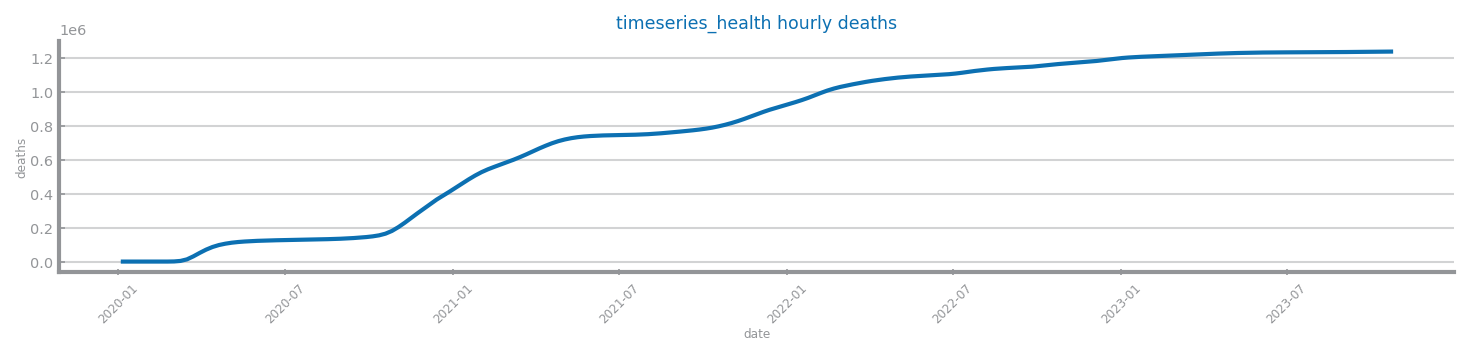

In [3]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

file_tag = "timeseries_health"
target = "deaths"
filepath = "../../../data/forecast_covid_single.csv"
data: DataFrame = read_csv(
    filepath,
    index_col="date",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]
print("Nr. Records = ", series.shape[0])
print("First timestamp", series.index[0])
print("Last timestamp", series.index[-1])

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} hourly {target}",
)
show()

<h3>Multivariate Time Series</h3>

In [4]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots
from matplotlib.figure import Figure


def plot_ts_multivariate_chart(data: DataFrame, title: str) -> list[Axes]:
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(data.shape[1], 1, figsize=(3 * HEIGHT, HEIGHT / 2 * data.shape[1]))
    fig.suptitle(title)

    for i in range(data.shape[1]):
        col: str = data.columns[i]
        plot_line_chart(
            data[col].index.to_list(),
            data[col].to_list(),
            ax=axs[i],
            xlabel=data.index.name,
            ylabel=col,
        )
    return axs

Nr. Records =  (199, 1)
First timestamp 2020-01-06 00:00:00
Last timestamp 2023-10-23 00:00:00


TypeError: 'Axes' object is not subscriptable

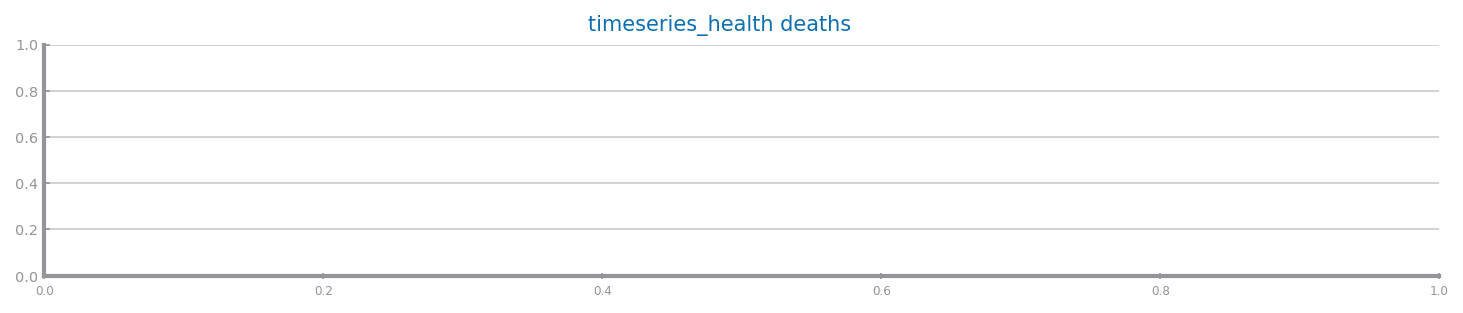

In [5]:
file_tag = "timeseries_health"
target = "deaths"
filepath = "../../../data/forecast_covid_single.csv"
data: DataFrame = read_csv(
    filepath,
    index_col="date",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
print("Nr. Records = ", data.shape)
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])

plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")
show()